<a href="https://colab.research.google.com/github/akashbhakat-bit/AMO1/blob/main/R_Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing & Importing Libraries

In [2]:
install.packages("tidyverse")
install.packages("ggthemes")
install.packages("lubridate")
install.packages("skimr")
install.packages("janitor")
install.packages("httr")
install.packages("readxl")
install.packages("vroom")
install.packages("countrycode")
install.packages("patchwork")
install.packages("gganimate")
install.packages("tictoc")
install.packages("DBI")
install.packages("dbplyr")
install.packages("arrow")
install.packages("rvest")
install.packages("scales")
install.packages("readxl")
install.packages("plotly")
install.packages("mosaic")
install.packages("infer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘snakecase’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘tweenr’




In [3]:
library(tidyverse)
library(mosaic)
library(ggthemes)
library(lubridate)
library(here)
library(skimr)
library(janitor)
library(httr)
library(readxl)
library(vroom)
library(wbstats)
library(countrycode)
library(patchwork)
library(gganimate)
library(tictoc)
library(DBI)
library(dbplyr)
library(arrow)
library(rvest)
library(scales)
library(readxl)
library(plotly)
library(infer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'mosaic':
  method                           from   
  fortify.SpatialPolygonsDataFrame ggplot2


The 'mosaic' package masks several functions from core packages in order to add 
additional features.  The original behavior of these functions should not be affected by this.


Attaching package: ‘mosaic’


The following object is masked from ‘package:Matrix’:

    mean


The following objects are masked from ‘package:dplyr’:

    count, d

ERROR: ignored

Question 1 -> Weather

In [ ]:
#```{r weather_data, cache=TRUE}

# Importing dataset
weather <-read_csv("https://data.giss.nasa.gov/gistemp/tabledata_v4/NH.Ts+dSST.csv",skip = 1,na = "***")

# Exploring Contents and Structure
head(weather)
skim(weather)

You have two objectives in this section:

1.  Select the year and the twelve month variables from the `weather`
    dataset. We do not need the others (J-D, D-N, DJF, etc.) for this
    assignment. Hint: use `select()` function.

2.  Convert the dataframe from wide to 'long' format. Hint: use
    `gather()` or `pivot_longer()` function. Name the new dataframe as
    `tidyweather`, name the variable containing the name of the month as
    `month`, and the temperature deviation values as `delta`.


In [ ]:
#```{r tidyweather}
#Select the year and the twelve month variables from the `weather`
#dataset. We do not need the others (J-D, D-N, DJF, etc.) for this
#assignment. Hint: use `select()` function.

selected_weather <- weather %>%         # Select the necessary columns
  select(Year, Jan:Dec)                 # selecting year and required months variable

head(selected_weather)                  # exploring resultant dataset structure


#Convert the dataframe from wide to 'long' format. Hint: use
#`gather()` or `pivot_longer()` function. Name the new dataframe as
#`tidyweather`, name the variable containing the name of the month as
#`month`, and the temperature deviation values as `delta`.

tidyweather <- selected_weather %>%
  pivot_longer(cols = Jan:Dec,          # selecting existing columns
               names_to = "month",      # assigning to new column
               values_to = "delta")     # assigning associated values

head(tidyweather)                       # exploring resultant dataset structure

#```

## Plotting Information

Let us plot the data using a time-series scatter plot, and add a
trendline. To do that, we first need to create a new variable called
`date` in order to ensure that the `delta` values are plot
chronologically.

In [ ]:
#Let us plot the data using a time-series scatter plot, and add a
#trendline. To do that, we first need to create a new variable called
#`date` in order to ensure that the `delta` values are plot
#chronologically.

# ```{r scatter_plot, eval=FALSE}

# Approach - 1. create dataframe with requirements, i.e., convert month-year to year-month-date format
#            2. plot the graph - scatter plot - geom_point() with trendline - geom_smotth()

tidyweather <- tidyweather %>%
  mutate(date = ymd(paste(as.character(Year), month, "1")),                     # Adding date - for time-series graph
         month = month(date, label=TRUE))                                       # Adding month

head(tidyweather)

ggplot(tidyweather, aes(x=date, y = delta))+
  geom_point()+                                                                                             # for plotting scatter plot
  geom_smooth(color="red") +                                                                                # add trendline of colour red for better readability
  theme_bw() +                                                                                              # theme
  labs ( x= "Timeline", y= "Difference from set-standard temperature", title = "Weather Anomalies"          # labels
  )


Is the effect of increasing temperature more pronounced in some months?
Use `facet_wrap()` to produce a seperate scatter plot for each month,
again with a smoothing line. Your chart should human-readable labels;
that is, each month should be labeled "Jan", "Feb", "Mar" (full or
abbreviated month names are fine), not `1`, `2`, `3`.

In [ ]:
# ```{r facet_wrap, echo=FALSE}

ggplot(tidyweather, aes(x=date, y = delta))+          #  X axis = Date, Y axis = Difference between temperatures - delta
  geom_point()+                                       # geom_point for scatter plot
  geom_smooth(color="red") +                          # geom_smooth to add trendline - Red color for better readability
  theme_bw() +
  facet_wrap(~month) +                                # facet_wrap to create plot month-wise
  labs (                                              # labels
    title =  x= "Timeline", y= "Difference from set-standard temperature", title = "Weather Anomalies"
  )

Is the effect of increasing temperature more pronounced in some months?

Answer - ?

Remove data before 1800 and before using `filter`. Then, we use the
`mutate` function to create a new variable `interval` which contains
information on which period each observation belongs to

In [ ]:
# ```{r intervals, eval=FALSE}
# Approach - 1. filter non-required years group
#            2. categorize into required intervals

comparison <- tidyweather %>%
  filter(Year>= 1881) %>%                                                       # filter to remove years prior to 1881
  mutate(interval = case_when(                                                  # create new variable 'interval', and assign values based on criteria below:
    Year %in% c(1881:1920) ~ "1881-1920",
    Year %in% c(1921:1950) ~ "1921-1950",
    Year %in% c(1951:1980) ~ "1951-1980",
    Year %in% c(1981:2010) ~ "1981-2010",
    TRUE ~ "2011-present"
  ))

head(comparison)

Year,month,delta,date,year,interval
<dbl>,<ord>,<dbl>,<date>,<dbl>,<chr>
1881,Jan,-0.32,1881-01-01,1881,1881-1920
1881,Feb,-0.24,1881-02-01,1881,1881-1920
1881,Mar,-0.06,1881-03-01,1881,1881-1920
1881,Apr,-0.02,1881-04-01,1881,1881-1920
1881,May,0.01,1881-05-01,1881,1881-1920
1881,Jun,-0.35,1881-06-01,1881,1881-1920


Now that we have the `interval` variable, we can create a density plot
to study the distribution of monthly deviations (`delta`), grouped by
the different time periods we are interested in. Set `fill` to
`interval` to group and colour the data by different time periods.


Warning message in geom_density(nrow = 1):
“Ignoring unknown parameters: `nrow`”
Warning message:
“Removed 5 rows containing non-finite values (`stat_density()`).”


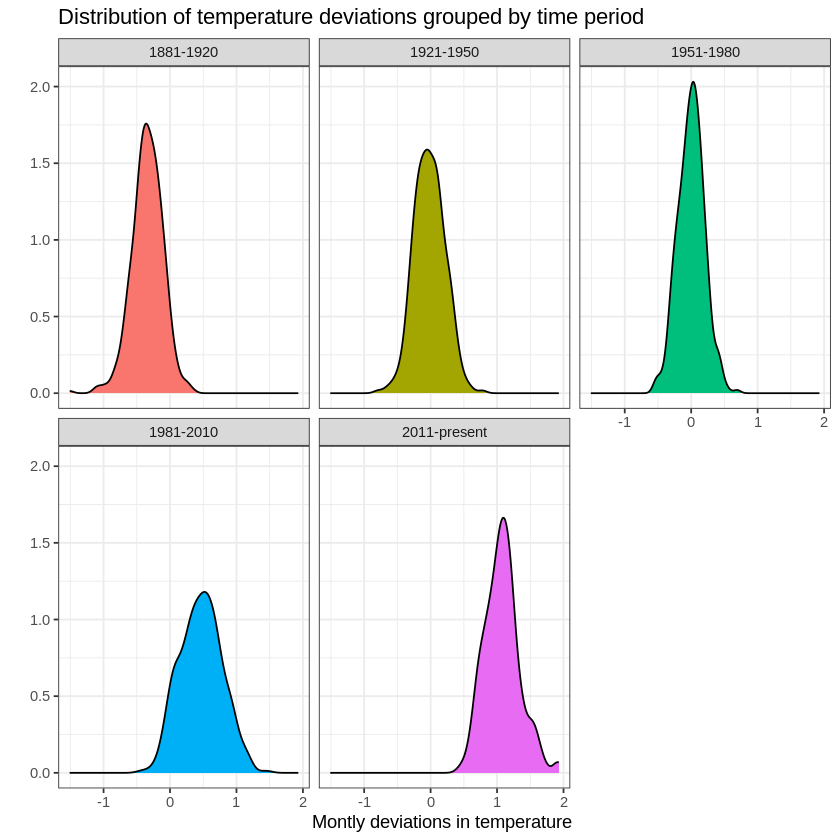

In [ ]:
# ```{r density_plot, eval=FALSE}
ggplot(comparison, aes(x = delta, fill = interval))+
  geom_density(ncol = 3)+                                                       # geom_density() - Density plot
  facet_wrap(~interval)+                                                        # facet_wrap() - plot by respective intervals
  theme_bw()+
  theme(legend.position = "none")+                                              # removing legen since we already categorized with facet_wrap
  labs(title = "Distribution of temperature deviations grouped by time period", # labels
       x = "Montly deviations in temperature ",
      y = "Temperature Deviation")

So far, we have been working with monthly anomalies. However, we might
be interested in average annual anomalies. We can do this by using
`group_by()` and `summarise()`, followed by a scatter plot to display
the result.

In [ ]:
# ```{r averaging, eval=FALSE}
average_annual_anomaly <- tidyweather %>%
  group_by(Year) %>%                                                            #grouping data by Year
  summarise(yearly_averages = mean(delta))                                      # creating summaries for mean delta
                                                                                # using `na.rm=TRUE` to eliminate NA (not available) values

#plotting the data:

ggplot(average_annual_anomaly, aes(y = yearly_averages, x = Year))+             # X axis = Year, Y axis = Yearly Averageof delta
              geom_point()+                                                     # scatter plot
              geom_smooth(method = "loess",se = F)+                             #method = "loess"
              theme_bw()+                                                       # black and white theme to have white background + black frame around plot
              labs(title = "Plot of average annual anomalies from 1880 - 2023", # labels
                   y = "Average annual anomaly")


Your task is to construct a confidence interval for the average annual
delta since 2011, both using a formula and using a bootstrap simulation
with the `infer` package. Recall that the dataframe `comparison` has
already grouped temperature anomalies according to time intervals; we
are only interested in what is happening between 2011-present.

95% confidence interval

In [ ]:
comparison_2011_present <- comparison %>% filter(interval== "2011-present")
head(comparison_2011_present)


Year,month,delta,date,year,interval
<dbl>,<ord>,<dbl>,<date>,<dbl>,<chr>
2011,Jan,0.61,2011-01-01,2011,2011-present
2011,Feb,0.56,2011-02-01,2011,2011-present
2011,Mar,0.88,2011-03-01,2011,2011-present
2011,Apr,0.84,2011-04-01,2011,2011-present
2011,May,0.65,2011-05-01,2011,2011-present
2011,Jun,0.76,2011-06-01,2011,2011-present


In [ ]:
alpha <- 0.05  # Set the confidence level (e.g., 95%)

mean_delta <- mean(comparison_2011_present$delta, na.rm=TRUE)
n <- length(comparison_2011_present, na.rm=TRUE)
se <- sd(comparison_2011_present$delta, na.rm=TRUE) / sqrt(n)

min_limit = mean_delta - 1.96*se
max_limit = mean_delta + 1.96*se
cat("Formula-Based Confidence Interval (95%): [", min_limit, ", ", max_limit, "]\n")
mean_delta
n
se

[1] 1.074172

[1] 6

[1] 0.1068315

In [ ]:
z <- qnorm(1 - alpha / 2)
margin_of_error <- z * se

# Calculate the confidence interval
lower_bound <- mean_delta - margin_of_error
upper_bound <- mean_delta + margin_of_error
cat("Formula-Based Confidence Interval (95%): [", lower_bound, ", ", upper_bound, "]\n")

Formula-Based Confidence Interval (95%): [ 0.8647863 ,  1.283558 ]


> What is the data showing us? Please type your answer after (and
> outside!) this blockquote. You have to explain what you have done, and
> the interpretation of the result. One paragraph max, please!

Answer - ??